# KNN Regression for Parkinson's Disease


## Overview
This notebook demonstrates the implementation of **K-Nearest Neighbors (KNN) Regression** to predict Parkinson's disease progression using the Parkinson's Telemonitoring dataset.

## What We're Doing
1. **Loading Data**: Import the Parkinson's disease dataset containing voice measurements
2. **Data Exploration**: Check dataset shape, display sample data, and check for missing values
3. **Data Preprocessing**: 
   - Separate features (X) and target variable (total_UPDRS)
   - Apply StandardScaler to normalize features
   - Split data into training and testing sets (70-30 split)
4. **Model Training & Evaluation**:
   - Test different K values (1 to 20) to find the optimal number of neighbors
   - Compare two distance metrics: Euclidean and Manhattan
   - Evaluate models using R² score
   - Visualize results with plots
5. **Results**: Identify the best K value for accurate predictions

## Dataset
- **Source**: Parkinson's Telemonitoring Dataset
- **Features**: Voice measurements including Jitter, Shimmer, HNR, RPDE, DFA, PPE
- **Target**: total_UPDRS (Unified Parkinson's Disease Rating Scale)
- **Samples**: 5,875 recordings

## Algorithm
**K-Nearest Neighbors (KNN) Regression** predicts values by finding K closest training examples and averaging their target values.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


## Load and Explore Dataset

In [ ]:
DATA_PATH = r"C:\Users\Saniya\Downloads\archive\telemonitoring_parkinsons_updrs.data.csv"
# Kaggle dataset link -> https://www.kaggle.com/datasets/rishidamarla/parkinsons-telemonitoring-data
df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head()


(5875, 22)


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## Check for Missing Values

In [5]:
print(df.isna().sum())


subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


## Data Preprocessing
- Split features and target
- Scale features
- Split train/test sets

In [6]:
X = df.drop(["total_UPDRS"], axis=1)
y = df["total_UPDRS"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


## Find Optimal K Value
Testing different K values with both distance metrics

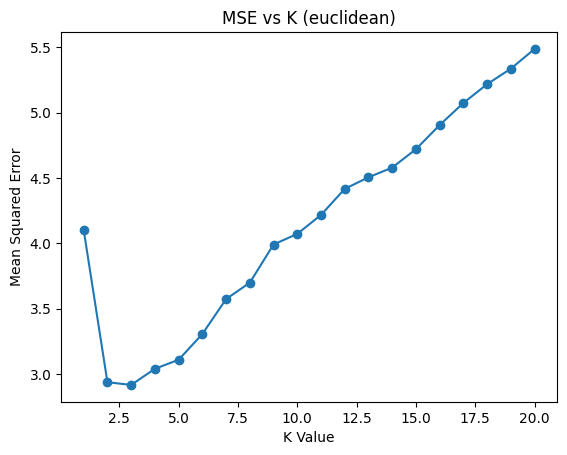

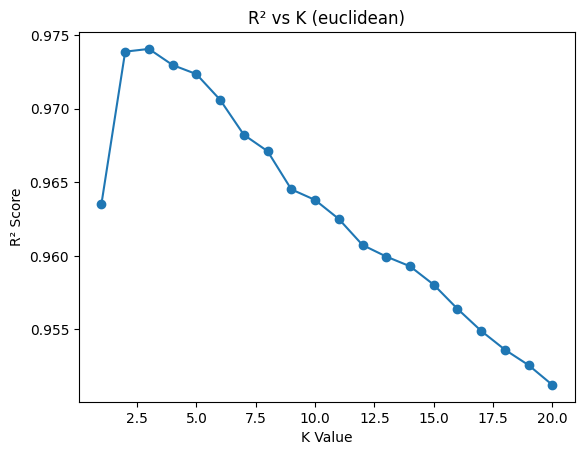

✅ Best K for euclidean: 3 with R²: 0.9741


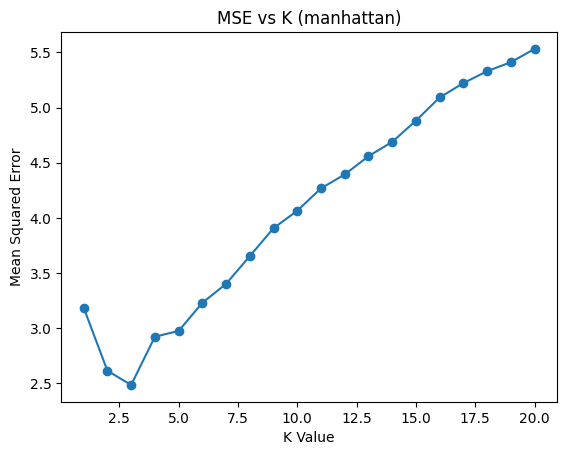

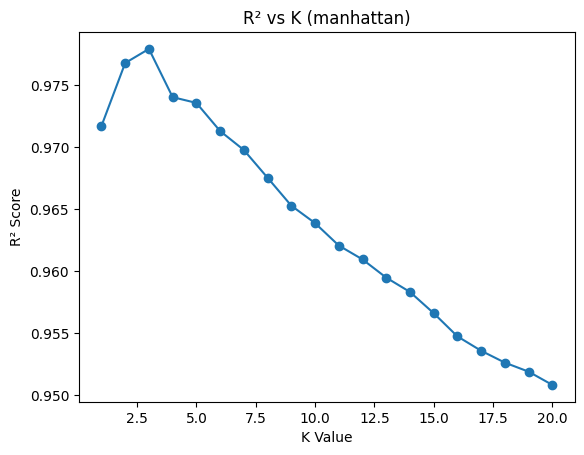

✅ Best K for manhattan: 3 with R²: 0.9779


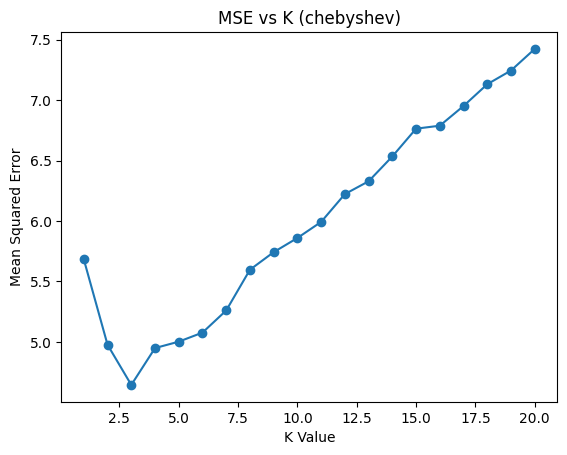

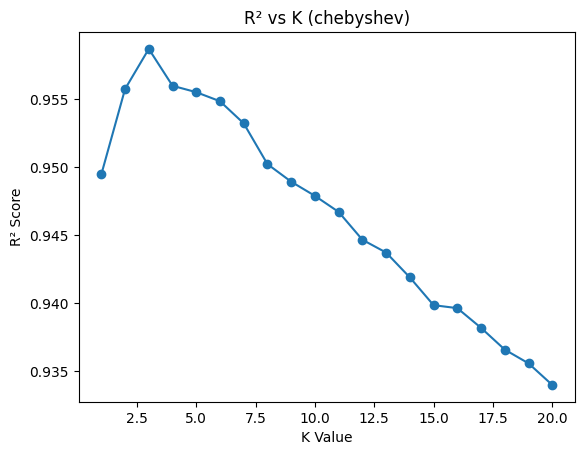

✅ Best K for chebyshev: 3 with R²: 0.9587


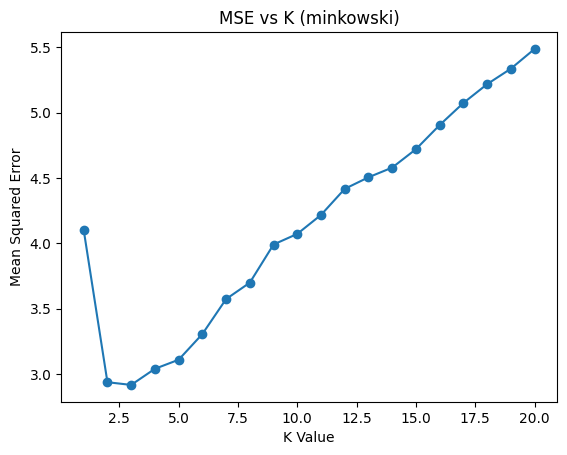

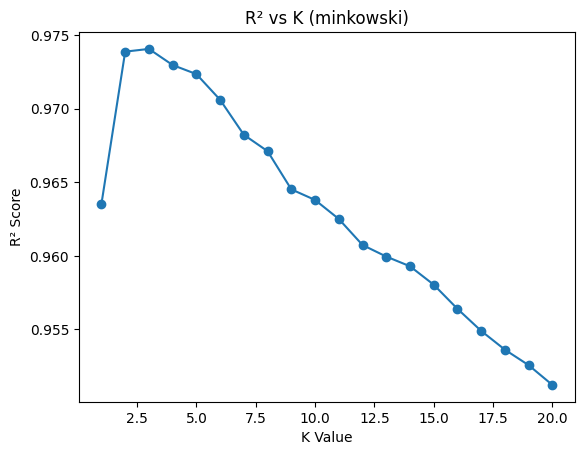

✅ Best K for minkowski: 3 with R²: 0.9741


In [ ]:
metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]

for metric in metrics:
    mse_list = []
    r2_list = []
    k_range = range(1, 21)

    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)

        mse_list.append(mean_squared_error(y_test, pred))
        r2_list.append(r2_score(y_test, pred))

    plt.plot(k_range, mse_list, marker='o')
    plt.xlabel("K Value")
    plt.ylabel("Mean Squared Error")
    plt.title(f"MSE vs K ({metric})")
    plt.show()

    plt.plot(k_range, r2_list, marker='o')
    plt.xlabel("K Value")
    plt.ylabel("R² Score")
    plt.title(f"R² vs K ({metric})")
    plt.show()

    best_k = k_range[np.argmax(r2_list)]
    best_r2 = max(r2_list)
    print(f"✅ Best K for {metric}: {best_k} with R²: {best_r2:.4f}")


In [8]:
best_k = 3 

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)

    print(f"Metric: {metric}")
    print("MSE:", mean_squared_error(y_test, pred))
    print("R² Score:", r2_score(y_test, pred))
    print("-"*50)


Metric: euclidean
MSE: 2.917207568849184
R² Score: 0.9740647186915615
--------------------------------------------------
Metric: manhattan
MSE: 2.4864636929986768
R² Score: 0.977894224590066
--------------------------------------------------
Metric: chebyshev
MSE: 4.645123848004032
R² Score: 0.9587027693891367
--------------------------------------------------
Metric: minkowski
MSE: 2.917207568849184
R² Score: 0.9740647186915615
--------------------------------------------------


C:\Users\Saniya\AppData\Local\Temp\ipykernel_20768\902143771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="R2_Score", data=results_df, ax=axes[0], palette="crest")
C:\Users\Saniya\AppData\Local\Temp\ipykernel_20768\902143771.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="MSE", data=results_df, ax=axes[1], palette="flare")


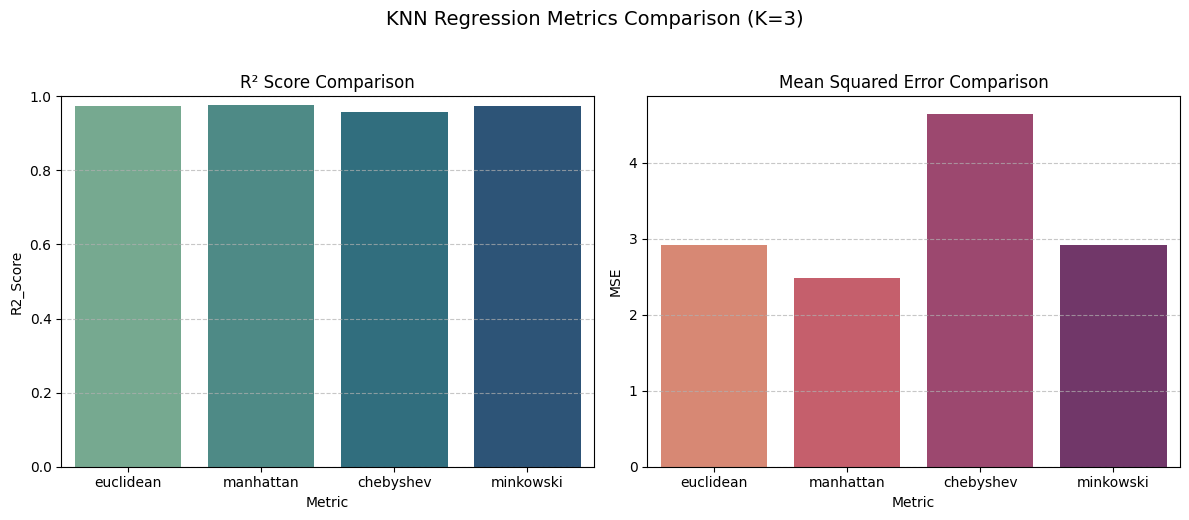

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.barplot(x="Metric", y="R2_Score", data=results_df, ax=axes[0], palette="crest")
axes[0].set_title("R² Score Comparison")
axes[0].set_ylim(0, 1)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

sns.barplot(x="Metric", y="MSE", data=results_df, ax=axes[1], palette="flare")
axes[1].set_title("Mean Squared Error Comparison")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.suptitle(f"KNN Regression Metrics Comparison (K={best_k})", fontsize=14, y=1.03)
plt.tight_layout()
plt.show()
